# Investigate Medical Appointment Dataset

#### A person makes a doctor's appointment, receives all the instructions, and no-show. Who to blame?

In this notebook we will try to analyze why would some patient not show up for his medical appointment and whether there are reasons for that using the data we have.
We will try to find some correlation between the different attributes we have and whether the patient shows up or not. The dataset we are going to use contains 110527 medical appointments and its 14 associated variables ( PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap', SMS_received, No-show )

## Objectives

### Questions to answer

- What is the percentage of no-show?
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
   - Is the time gender related to whether a patient will show or not?
   - Are patients with scholarship more likely to miss their appointment?
   - Are patients who don't recieve sms more likely to miss their appointment?
   - Is the time difference between the scheduling and appointment related to whether a patient will show?
   - Does age affect whether a patient will show up or not?
   - What is the percentage of patients missing their appointments for every neighbourhood

### Setup

In [1]:
# Importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#choosing plot styles
sns.set_style('darkgrid')

#making sure plots are inline with the notebook
%matplotlib inline

## Data Wrangling

### loading the dataset and checking the columns we have

Load the data and print out a few lines, perform operations to inspect data types and look for instances of missing or possibly errant data. 


In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Getting the shape and types of data
print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [4]:
#getting some statistics about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# checking if there is any missing value in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
# checking if there is any duplicated row in our data
df.duplicated().any()

False

## Data Cleaning

We can see from the info we got from our analysis that there are some columns that need to have their type corrected like dates. Another great finding is that our data doesn't have any duplicated or missing values. Also, the column no-show can be a bit confusing and we can invert the values to make it more intuitive (show instead of no-show) and we can also turn it to integer instead of yes or no.

Now we will perform following steps for data cleaning:-
- Drop irrelevant columns
- Modify column names
- Correct data types
- Invert no-show column in to show with integer values
- Create a new column for days difference between scheduling an appointment


In [7]:
# Dropping irrelevant columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Changing all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [9]:
# Changing data columns to date type
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [10]:
# changing attribute from 'no_show' to 'show'
print(df.no_show.unique())
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
df.rename(columns={'hipertension':'hypertension'},inplace=True)
print(df.show.unique())
df.head()

['No' 'Yes']
[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [11]:
# Creating a new column for days difference between scheduling and appointment
day_diff=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days 
df.insert(3,'day_diff',day_diff)
df.day_diff.dtype

dtype('int64')

In [12]:
### Checking data one last time
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
show                            int64
dtype: object

## Exploratory Data Analysis

Now that we have our data cleaned and with the proper type for every column and also created a new time difference column.
Now we can start analyzing our data and try to find the correlation between different variables and the show column.

In [13]:
#define function to get the ratio of show in different categories
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar',
                                    edgecolor='black',
                                    figsize=(14,8)).set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())
#     plt.legend()

### What is the percentage of no-show ?

In [14]:
#getting some statistics about our data
df.describe()

,day_diff,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


percentage of patients who didn't show up for their appointment is 20.193255946510803 %


,show
show,
0,22319
1,88208


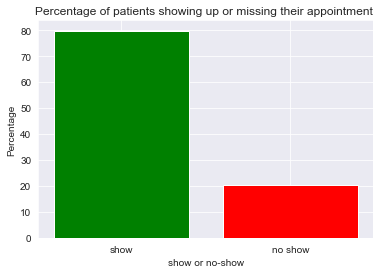

In [15]:
# percentage of show and no show
print(f"percentage of patients who didn't show up for their appointment is { (1-df.show.mean())*100 } %" )
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
display(df.groupby('show')[['show']].count())

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [16]:
#creating filters for show and no-show
show=(df.show == 1)
no_show=(df.show == 0)
total_miss=len(df[no_show])
total=len(df)

### Is the time gender related to whether a patient will show or not?

percentage of Females and Males who missed their appointment:


,gender
F,13.204013
M,6.989242


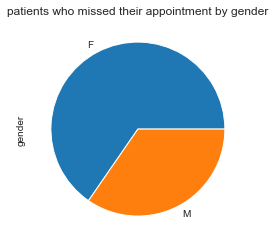

In [17]:
#getting the number of patients missing their appointments by gender
no_show_gender=df[no_show]['gender'].value_counts()
no_show_gender.plot(kind='pie');
plt.title('patients who missed their appointment by gender');
print('percentage of Females and Males who missed their appointment:')
#get the percentage of patients missing their appointments by gender
pd.DataFrame(no_show_gender*100/total)

Text(0, 0.5, 'number of patients')

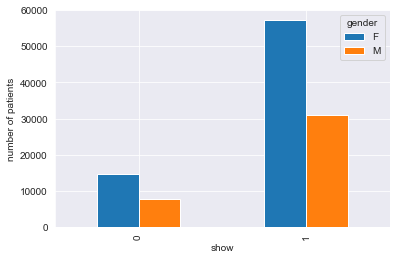

In [18]:
df.groupby(['gender','show']).size().unstack('gender').plot(kind='bar').set_ylabel('number of patients')

Here we observe that the percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.

### Are patients with scholarships more likely to miss their appointment?

,show
scholarship,
0,0.801928
1,0.762637


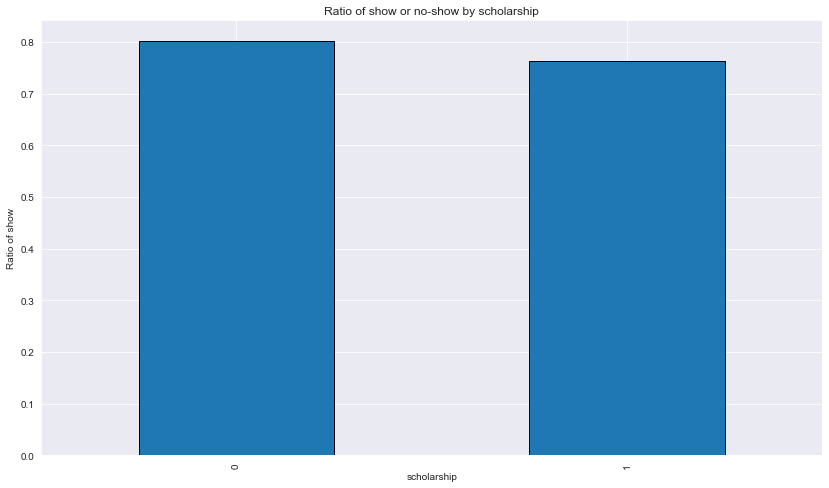

In [19]:
#what is the percentage of patients missing their appointment by scholarship
plot_rat(df.scholarship)
plt.title('Ratio of show or no-show by scholarship');
# df.groupby('scholarship')[['show']].mean()

Here, it seems that patients with scholarships are actually more likely to miss their appointment

### Are patients with hypertension more likely to miss their appointment?

,show
hypertension,
0,0.790963
1,0.826980


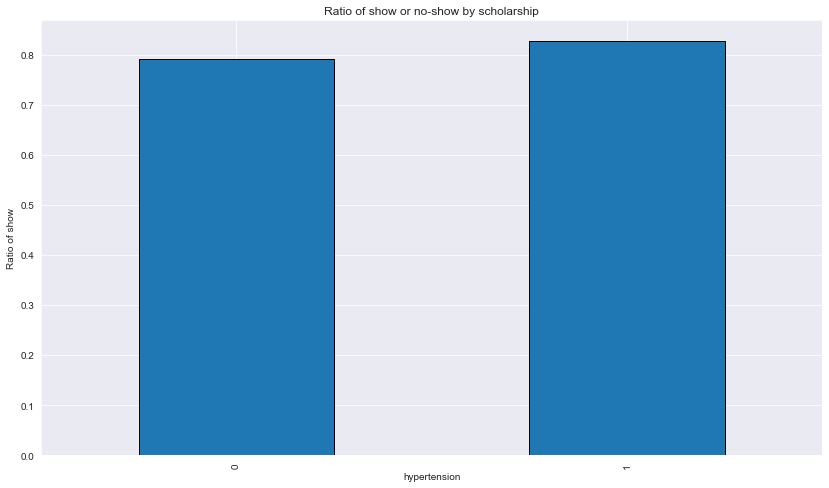

In [20]:
#what is the percentage of patients missing their appointment by hypertension
plot_rat(df.hypertension)
plt.title('Ratio of show or no-show by scholarship');

Here, it seems that patients with hypertension are actually more likely to show up for their appointment

### Are patients who don't receive SMS more likely to miss their appointment?

,show
sms_received,
0,0.832967
1,0.724255


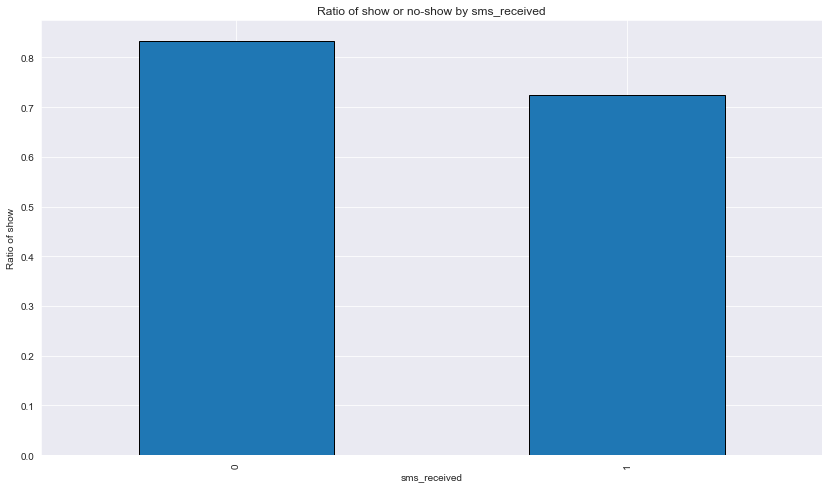

In [21]:
#what is the percentage of patient who attended their appointment by sms_received
plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received');

Here a strange finding suggests that patients who received an SMS are more likely to miss their appointment !!

### Is the time difference between the scheduling and appointment related to whether a patient will show?

The propotion of different time difference for patients who missed their appiontments:


,day_diff2
more_than_15,38.460505
more_than_4,32.922622
fewdays,20.565438
sameday,8.029034


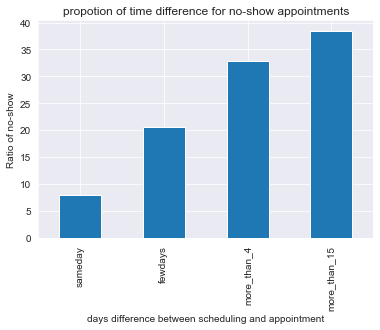

In [22]:
#filtering for positive day difference
df1=df[df.day_diff>=0]

# df1.day_diff.unique()
#turn day diff into categorical column day_diff2

bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)

#filtering for no-show records and count values for each category of day_diff2

no_show_day_diff=df[no_show].day_diff2.value_counts()/len(df[no_show])*100
no_show_day_diff.reindex(names).plot(kind='bar');
plt.title('propotion of time difference for no-show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no-show');
print('The propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

Here it appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.

### Does age affect whether a patient will show up or not?

,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


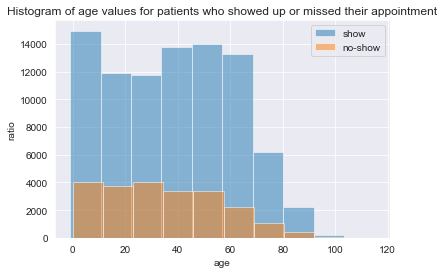

In [23]:
#plotting the histograns of age for patients who showed up and who didn't
df[show].age.hist(alpha=0.5,label='show')
df[no_show].age.hist(alpha=0.5,label='no-show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')

#getting the mean age for patients who showed up and who didn't
df[no_show][['age']].describe()

Here it shows no clear relation between the age and whether the patient shows up or not but younger patients are more likely to miss their appointments.

### What is the percentage of patients missing their appointments for every neighborhood?

In [24]:
#getting the number of records for each neighbourhood
rec_neigh=df['neighbourhood'].value_counts()

#getting the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no_show=df[no_show].neighbourhood.value_counts()

#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage=rec_neigh_no_show/rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
...,...
SOLON BORGES,0.147122
MÁRIO CYPRESTE,0.145553
AEROPORTO,0.125000
ILHA DO BOI,0.085714


## Conclusions

### After analyzing the dataset here are some findings:

- Percentage of patients who didn't show up for their appointment is 20.19%.
- The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.
- It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.
- It seems that patients with scholarships are actually more likely to miss their appointment.
- A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
- There is no clear relation between the age and whether the patients show up or not but younger patients are more likely to miss their appointments.

### Analysis Shortcoming & Data Limitations
- The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
- The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
- The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
- When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.